Objectif :

- Créer des visualisations complémentaires de la distribution temporelle en générant des graphiques en aires empilées pour illustrer l'évolution mensuelle du nombre d'accidents selon les jours de la semaine.

In [ ]:
fusion_clean = pd.read_csv('fusion_def_clean.csv', low_memory=False)
fusion_clean.head(10)

,Unnamed: 0,num_acc,mois,jour,lum,agg,int,atm,col,com,...,actp,etatp,an_nais,secuUn,secuDeux,an_naiss,age_acc,age_acc_seconds,age_acc_an,tranches_ages
0,0,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1976-01-01,Ceinture,Ceinture,1976-01-01,10593 days,9.152352e+08,29.021918,23-31
1,1,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1968-01-01,Ceinture,Ceinture,1968-01-01,13515 days,1.167696e+09,37.027397,32-40
2,2,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1964-01-01,Ceinture,Ceinture,1964-01-01,14976 days,1.293926e+09,41.030137,41-50
3,3,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,2004-01-01,Dispositif enfants,Ceinture,2004-01-01,366 days,3.162240e+07,1.002740,0-11
4,4,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1998-01-01,Ceinture,Ceinture,1998-01-01,2557 days,2.209248e+08,7.005479,0-11
5,5,200500000001,1,12,Nuit sans éclairage public,En agglomération,Hors intersection,Normale,Deux véhicules – par le coté,11,...,0,Non renseigné,1991-01-01,Ceinture,Ceinture,1991-01-01,5114 days,4.418496e+08,14.010959,12-22
6,6,200500000002,1,21,Plein jour,En agglomération,Hors intersection,Normale,Deux véhicules - frontale,51,...,0,Non renseigné,1955-01-01,Ceinture,Ceinture,1955-01-01,18263 days,1.577923e+09,50.035616,50+
7,7,200500000002,1,21,Plein jour,En agglomération,Hors intersection,Normale,Deux véhicules - frontale,51,...,0,Non renseigné,1979-01-01,Casque,Ceinture,1979-01-01,9497 days,8.205408e+08,26.019178,23-31
8,8,200500000003,1,21,Nuit sans éclairage public,Hors agglomération,Hors intersection,Pluie légère,Deux véhicules - frontale,51,...,0,Non renseigné,1983-01-01,Casque,Ceinture,1983-01-01,8036 days,6.943104e+08,22.016438,12-22
9,9,200500000003,1,21,Nuit sans éclairage public,Hors agglomération,Hors intersection,Pluie légère,Deux véhicules - frontale,51,...,0,Non renseigné,1956-01-01,Casque,Ceinture,1956-01-01,17898 days,1.546387e+09,49.035616,41-50


In [ ]:
# Nombre de lignes et de colonnes dans le dataframe
fusion_clean.shape

(2192779, 48)

In [ ]:
fusion_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192779 entries, 0 to 2192778
Data columns (total 48 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   num_acc             int64  
 2   mois                int64  
 3   jour                int64  
 4   lum                 object 
 5   agg                 object 
 6   int                 object 
 7   atm                 object 
 8   col                 object 
 9   com                 object 
 10  dep                 object 
 11  annee_x_x           int64  
 12  date                object 
 13  jour_de_la_semaine  int64  
 14  heure               int64  
 15  catr                object 
 16  circ                object 
 17  nbv                 float64
 18  vosp                object 
 19  prof                object 
 20  plan                object 
 21  surf                object 
 22  infra               object 
 23  situ                object 
 24  senc                obje

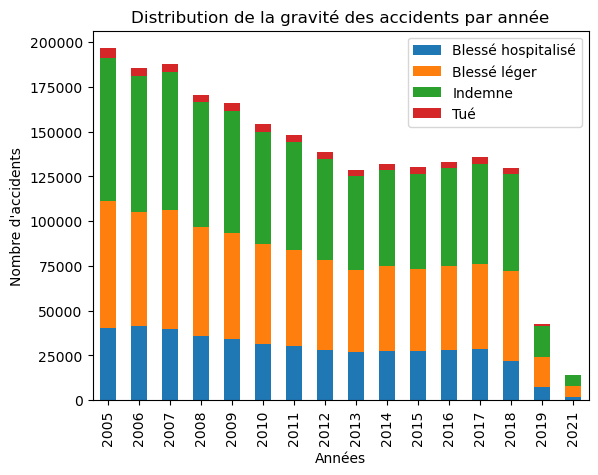

In [ ]:
# Groupage des données par année et gravité, puis calcul du nombre d'occurrences
grouped_data = fusion_clean.groupby(['annee_x_x', 'grav']).size().unstack(fill_value=0)

# Création du graphique en barres empilées
grouped_data.plot(kind='bar', stacked=True)


plt.title("Distribution de la gravité des accidents par année")
plt.xlabel('Années')
plt.ylabel("Nombre d'accidents")

plt.legend()

plt.show()

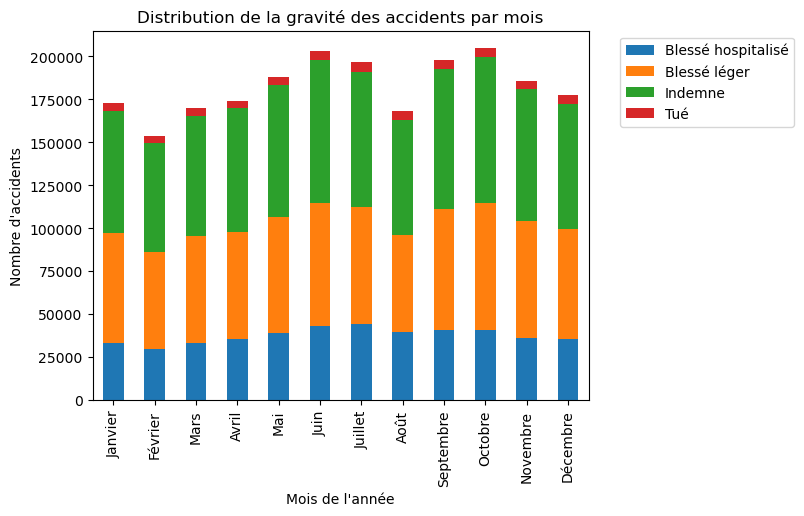

In [ ]:
# Groupage des données par mois et gravité, puis calcul du nombre d'occurrences
grouped_data = fusion_clean.groupby(['mois', 'grav']).size().unstack(fill_value=0)

# Création du graphique en barres empilées
ax = grouped_data.plot(kind='bar', stacked=True)

plt.title("Distribution de la gravité des accidents par mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre d'accidents")

# Déplacer la légende en dehors du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(np.arange(12), ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'], rotation=90)

plt.show()


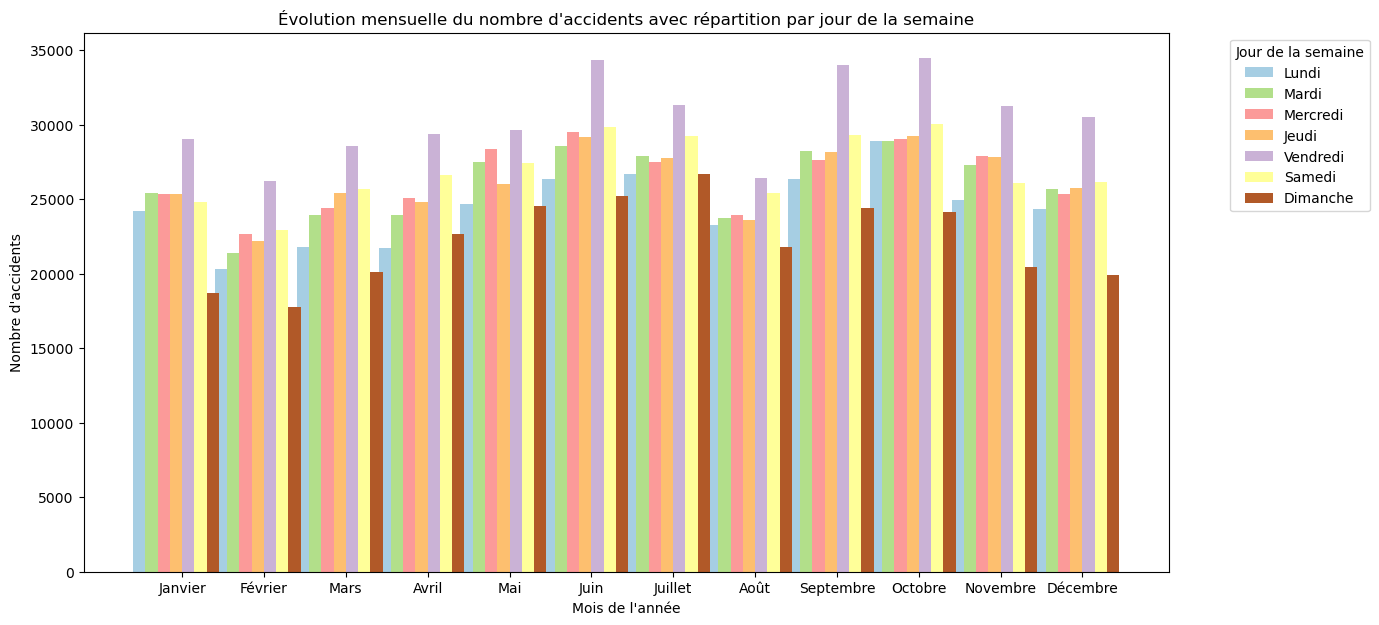

In [ ]:
# Groupage des données par mois et jour de la semaine, puis calcul du nombre d'occurrences
grouped_data = fusion_clean.groupby(['mois', 'jour_de_la_semaine']).size().unstack(fill_value=0)

# Création du graphique en barres côte à côte
fig, ax = plt.subplots(figsize=(14, 7))

# Liste des jours de la semaine à afficher dans la légende
jours_semaine = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Couleurs pour chaque jour de la semaine
colors = plt.cm.Paired(np.linspace(0, 1, len(jours_semaine)))

bar_width = 0.15
num_weekdays = len(grouped_data.columns)

for i, day in enumerate(grouped_data.columns):
    x_positions = np.arange(len(grouped_data)) + (i - num_weekdays / 2) * bar_width
    ax.bar(x_positions, grouped_data[day], width=bar_width, label=jours_semaine[i], color=colors[i])

# Définition des labels et du titre du graphique
plt.xlabel('Mois de l\'année')
plt.ylabel('Nombre d\'accidents')
plt.title('Évolution mensuelle du nombre d\'accidents avec répartition par jour de la semaine')
plt.xticks(np.arange(len(grouped_data)), ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'])

# Ajouter une légende
ax.legend(title='Jour de la semaine', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

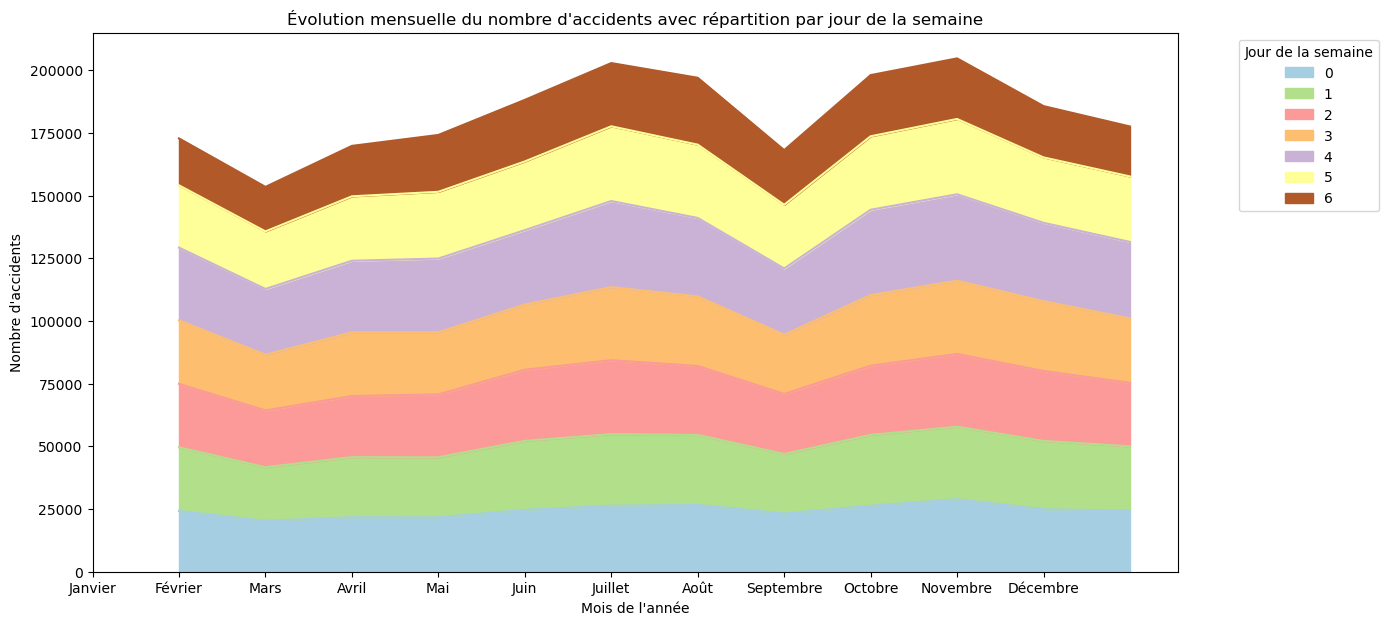

In [ ]:
# Groupage des données par mois et jour de la semaine, puis calcul du nombre d'occurrences
grouped_data = fusion_clean.groupby(['mois', 'jour_de_la_semaine']).size().unstack(fill_value=0)

# Création du graphique en aires empilées
ax = grouped_data.plot.area(stacked=True, cmap='Paired', figsize=(14, 7))

# Définition des labels et du titre du graphique
plt.xlabel('Mois de l\'année')
plt.ylabel('Nombre d\'accidents')
plt.title('Évolution mensuelle du nombre d\'accidents avec répartition par jour de la semaine')
plt.xticks(np.arange(len(grouped_data)), ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'])

# Ajoute d'une légende
ax.legend(title='Jour de la semaine', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


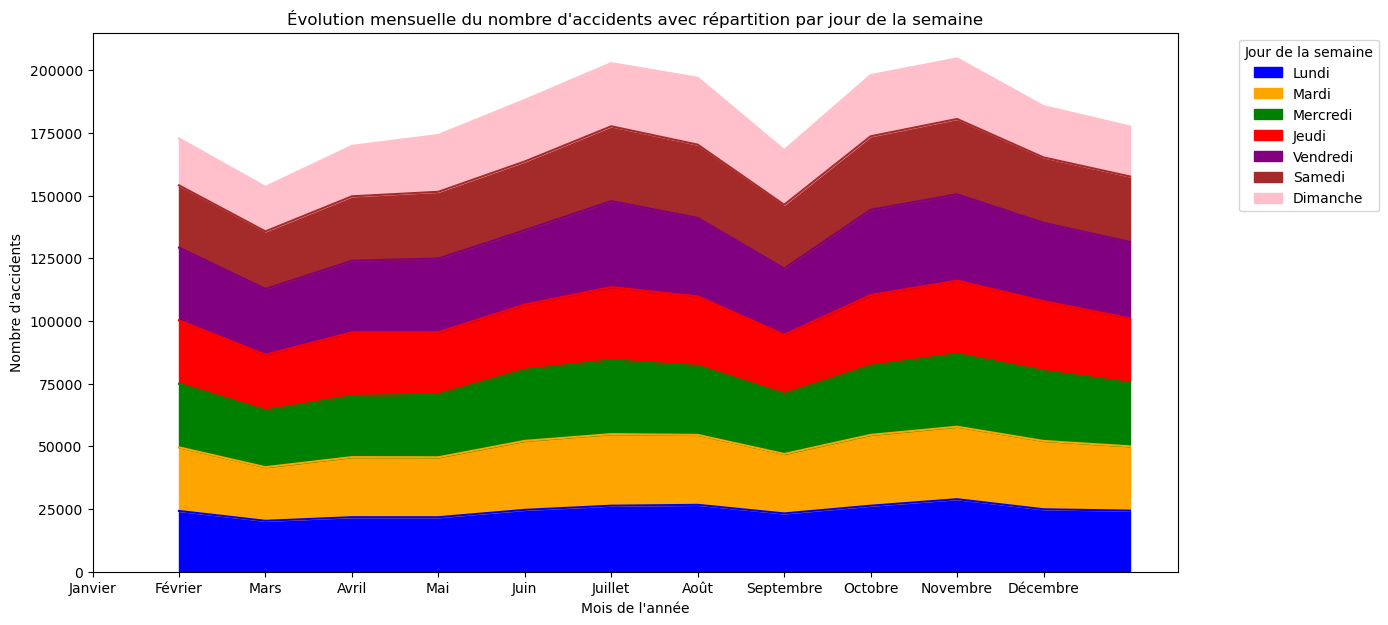

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Groupage des données par mois et jour de la semaine, puis calcul du nombre d'occurrences
grouped_data = fusion_clean.groupby(['mois', 'jour_de_la_semaine']).size().unstack(fill_value=0)

# Création du graphique en aires empilées avec des couleurs personnalisées pour chaque jour de la semaine
jours_semaine = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

ax = grouped_data.plot.area(stacked=True, figsize=(14, 7), color=colors)

# Définition des labels et du titre du graphique
plt.xlabel('Mois de l\'année')
plt.ylabel('Nombre d\'accidents')
plt.title('Évolution mensuelle du nombre d\'accidents avec répartition par jour de la semaine')

# Remplacement des étiquettes de l'axe x (les mois) par les noms des mois
plt.xticks(np.arange(len(grouped_data)), ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre'])

# Créeation d'une légende avec les noms des jours de la semaine et les couleurs correspondantes
legend_labels = jours_semaine
legend_colors = colors
ax.legend(title='Jour de la semaine', labels=legend_labels, handles=[plt.Rectangle((0,0),1,1, color=col) for col in legend_colors], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


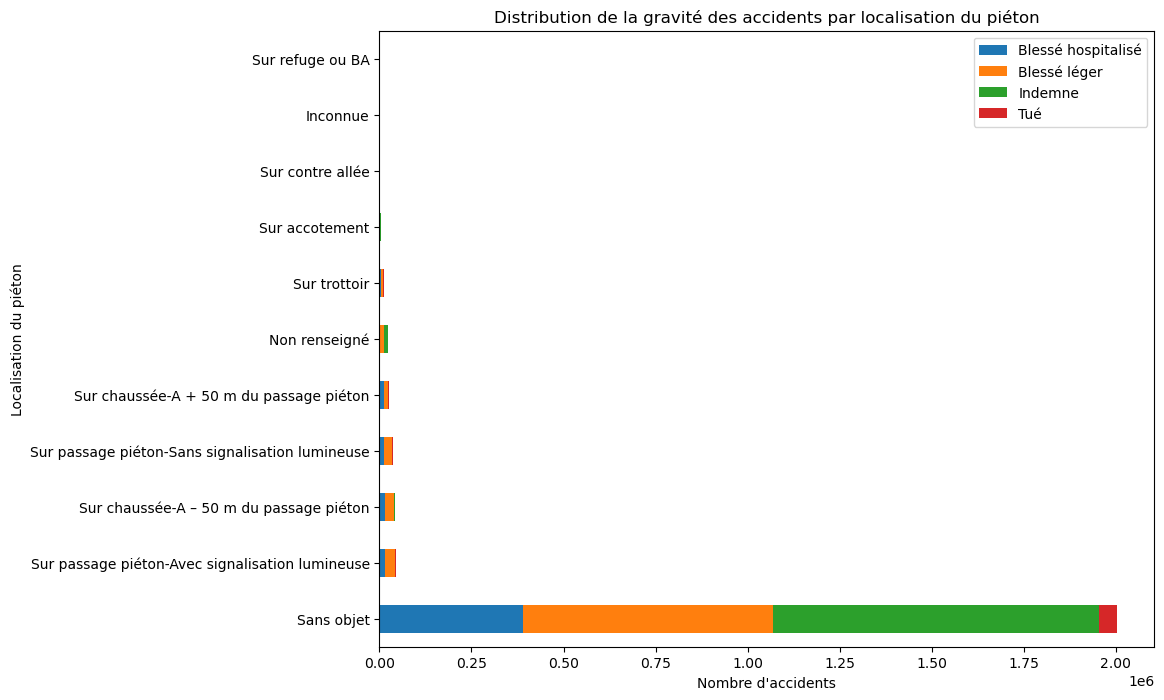

In [ ]:
# Groupage des données puis calcul du nombre d'occurrences
grouped_data = fusion_clean.groupby(['locp', 'grav']).size().unstack(fill_value=0)

# Calcul du total des accidents pour chaque localisation du piéton
grouped_data['Total'] = grouped_data.sum(axis=1)

# Tri des localisations du piéton par ordre décroissant du nombre d'accidents
sorted_locations = grouped_data['Total'].sort_values(ascending=False).index

# Utilisation de l'ordre trié pour réorganiser les lignes du DataFrame grouped_data
grouped_data_sorted = grouped_data.loc[sorted_locations].drop(columns='Total')

# Création du graphique en barres empilées avec axes inversés
grouped_data_sorted.plot(kind='barh', stacked=True, figsize=(10, 8))

plt.title("Distribution de la gravité des accidents par localisation du piéton")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Localisation du piéton")

plt.legend()
plt.show()


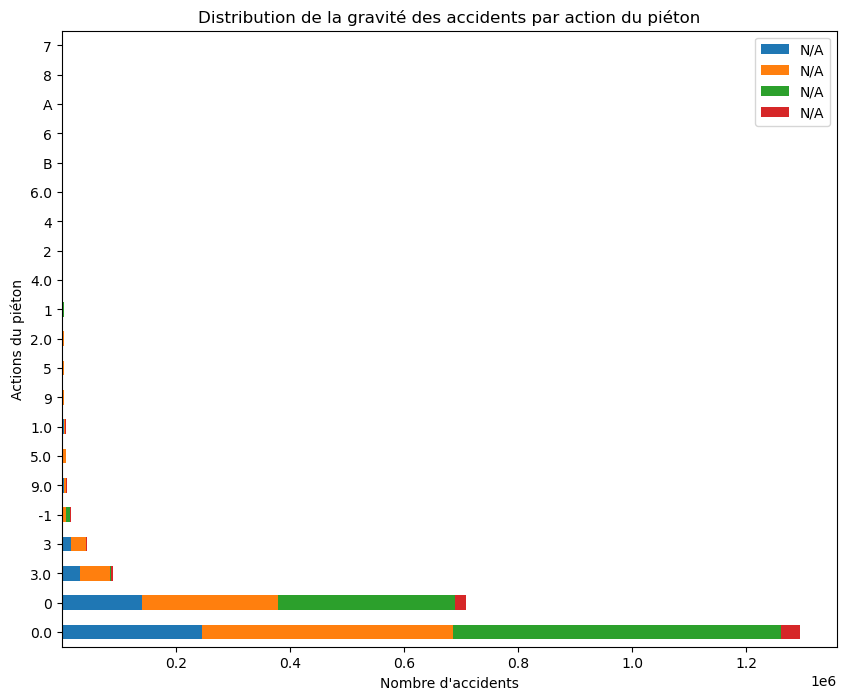

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Table de correspondance numéros -> significations
correspondance = {
    -1: 'Non renseigné',
    0: 'Non renseigné ou sans objet',
    1: 'Sens véhicule heurtant',
    2: 'Sens inverse du véhicule',
    3: 'Traversant',
    4: 'Masqué',
    5: 'Jouant – courant',
    6: 'Avec animal',
    9: 'Autre',
    'A': 'Monte/descend du véhicule',
    'B': 'Inconnue',
}

# Groupage des données puis calcul du nombre d'occurrences
grouped_data = fusion_clean.groupby(['actp', 'grav']).size().unstack(fill_value=0)

# Création d'une fonction pour remplacer les numéros par les significations
def map_to_signification(action):
    return correspondance.get(action, 'N/A')

# Remplacement des numéros par les significations dans les noms de colonnes
grouped_data.columns = [map_to_signification(action) for action in grouped_data.columns]

# Calcul du nbre total des accidents pour chaque action du piéton
grouped_data['Total'] = grouped_data.sum(axis=1)

# Tri des actions du piéton par ordre décroissant du nombre d'accidents
sorted_actions = grouped_data['Total'].sort_values(ascending=False).index

# Utilisation de l'ordre trié pour réorganiser les lignes du DataFrame grouped_data
grouped_data_sorted = grouped_data.loc[sorted_actions].drop(columns='Total')

# Création du graphique en barres empilées avec axes inversés
grouped_data_sorted.plot(kind='barh', stacked=True, figsize=(10, 8))

plt.title("Distribution de la gravité des accidents par action du piéton")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Actions du piéton")

plt.legend()
plt.show()
